In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [452]:
train = pd.read_csv('/content/drive/MyDrive/KT_Aivle_School/Data/Contest/AISPARK_4th/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/KT_Aivle_School/Data/Contest/AISPARK_4th/test_data.csv')

In [453]:
train.shape, test.shape

((2463, 8), (7389, 8))

In [454]:
train.columns

Index(['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type'],
      dtype='object')

In [455]:
hp_dict = {0:30, 1:20, 2:10, 3:50, 4:30, 5:30, 6:30, 7:30}

train['HP'] = train['type'].map(hp_dict)
test['HP'] = test['type'].map(hp_dict)

In [456]:
train['pressure'] = train['air_end_temp'] / train['air_inflow']
test['pressure'] = test['air_end_temp'] / test['air_inflow']

train['pressure'] = train['out_pressure'] / train['pressure']
test['pressure'] = test['out_pressure'] / test['pressure']

train['pressure'] = train['pressure'] / train['motor_current'] / train['motor_rpm'] * train['HP'] 
test['pressure'] = test['pressure'] / test['motor_current'] / test['motor_rpm'] * test['HP'] 

In [457]:
train['pressure'].isnull().sum(), test['pressure'].isnull().sum()

(0, 0)

In [458]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((data > upper_bound) | (data < lower_bound))

In [459]:
train_00 = train.loc[train['HP'] == 10].reset_index(drop=True)
train_01 = train.loc[train['HP'] == 20].reset_index(drop=True)
train_02 = train.loc[train['HP'] == 30].reset_index(drop=True)
train_03 = train.loc[train['HP'] == 50].reset_index(drop=True)

In [460]:
motor_vibe_0_outlier_index = outliers_iqr(train_00['motor_vibe'])[0]
motor_vibe_1_outlier_index = outliers_iqr(train_01['motor_vibe'])[0]
motor_vibe_2_outlier_index = outliers_iqr(train_02['motor_vibe'])[0]
motor_vibe_3_outlier_index = outliers_iqr(train_03['motor_vibe'])[0]
motor_vibe_0_outlier_index, motor_vibe_1_outlier_index, motor_vibe_2_outlier_index, motor_vibe_3_outlier_index

print(train_01.shape)
train_01.drop(motor_vibe_1_outlier_index, axis=0, inplace=True)
train_01.reset_index(drop=True, inplace=True)
print(train_01.shape)

train = pd.concat([train_00, train_01, train_02, train_03], axis=0, join='outer')
train = train.drop('HP', axis=1)
test = test.drop('HP', axis=1)

(369, 10)
(353, 10)


In [461]:
train.reset_index(drop=True, inplace=True)

In [462]:
train_00 = train.loc[train['type'] == 0]
train_01 = train.loc[train['type'] == 1]
train_02 = train.loc[train['type'] == 2]
train_03 = train.loc[train['type'] == 3]
train_04 = train.loc[train['type'] == 4]
train_05 = train.loc[train['type'] == 5]
train_06 = train.loc[train['type'] == 6]
train_07 = train.loc[train['type'] == 7]

test_00 = test.loc[test['type'] == 0]
test_01 = test.loc[test['type'] == 1]
test_02 = test.loc[test['type'] == 2]
test_03 = test.loc[test['type'] == 3]
test_04 = test.loc[test['type'] == 4]
test_05 = test.loc[test['type'] == 5]
test_06 = test.loc[test['type'] == 6]
test_07 = test.loc[test['type'] == 7]

In [463]:
train_00.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
train_01.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
train_02.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
train_03.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
train_04.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
train_05.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
train_06.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
train_07.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)

test_00.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
test_01.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
test_02.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
test_03.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
test_04.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
test_05.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
test_06.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)
test_07.drop(['air_inflow', 'pressure', 'motor_current', 'motor_rpm', 'motor_vibe', 'out_pressure', 'type'], axis=1, inplace=True)

In [464]:
train_00.columns

Index(['air_end_temp', 'motor_temp'], dtype='object')

In [465]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# train_000 = pca.fit_transform(train_00); test_000 = pca.transform(test_00)
# train_000 = pd.DataFrame(test_000, columns=['x1', 'x2']); test_000 = pd.DataFrame(test_000, columns=['x1', 'x2'])

# train_001 = pca.fit_transform(train_01); test_001 = pca.transform(test_01)
# train_001 = pd.DataFrame(train_001, columns=['x1', 'x2']); test_001 = pd.DataFrame(test_001, columns=['x1', 'x2'])

# train_002 = pca.fit_transform(train_02); test_002 = pca.transform(test_02)
# train_002 = pd.DataFrame(train_002, columns=['x1', 'x2']); test_002 = pd.DataFrame(test_002, columns=['x1', 'x2'])

# train_003 = pca.fit_transform(train_03); test_003 = pca.transform(test_03)
# train_003 = pd.DataFrame(train_003, columns=['x1', 'x2']); test_003 = pd.DataFrame(test_003, columns=['x1', 'x2'])

# train_004 = pca.fit_transform(train_04); test_004 = pca.transform(test_04)
# train_004 = pd.DataFrame(train_004, columns=['x1', 'x2']); test_004 = pd.DataFrame(test_004, columns=['x1', 'x2'])

# train_005 = pca.fit_transform(train_05); test_005 = pca.transform(test_05)
# train_005 = pd.DataFrame(train_005, columns=['x1', 'x2']); test_005 = pd.DataFrame(test_005, columns=['x1', 'x2'])

# train_006 = pca.fit_transform(train_06); test_006 = pca.transform(test_06)
# train_006 = pd.DataFrame(train_006, columns=['x1', 'x2']); test_006 = pd.DataFrame(test_006, columns=['x1', 'x2'])

# train_007 = pca.fit_transform(train_07); test_007 = pca.transform(test_07)
# train_007 = pd.DataFrame(train_007, columns=['x1', 'x2']); test_007 = pd.DataFrame(test_007, columns=['x1', 'x2'])

In [466]:
cols = [n for n in train_00.columns if n != 'type' and n != 'HP']
print(cols)
train_datas = [train_00, train_01, train_02, train_03, train_04, train_05, train_06, train_07]
test_datas = [test_00,test_01,test_02,test_03,test_04,test_05,test_06,test_07]

nt,coefs,incpts=[],[],[]
for n in range(len(cols) - 1):
    for m in range(n + 1, len(cols)):
        print(cols[n], cols[n+1])
        df_linear = pd.DataFrame(columns=['new_type','coef','intercept'])
        for i,df in enumerate(train_datas):
            coef, intercept = np.polyfit(df[cols[n]], df[cols[m]], 1)
            df[f'{cols[n]}_{cols[m]}'] = df[cols[m]] - coef*df[cols[n]] - intercept
            print(f'x_train_{i}의 선형관계: y = {coef}x + {intercept}')
            nt.append(i)
            coefs.append(coef)
            incpts.append(intercept)
        df_linear['new_type'] = nt
        df_linear['coef'] = coefs
        df_linear['intercept'] = incpts
        # df_linear.head()

        for i,df in enumerate(test_datas):
            coef,intercept = df_linear.loc[i,'coef'], df_linear.loc[i,'intercept']
            df[f'{cols[n]}_{cols[m]}'] = df[cols[m]] - coef*df[cols[n]] - intercept

['air_end_temp', 'motor_temp']
air_end_temp motor_temp
x_train_0의 선형관계: y = 0.8889093108034911x + 22.220295070230463
x_train_1의 선형관계: y = 0.8890798599196207x + 21.99953977862748
x_train_2의 선형관계: y = 0.8888837333810641x + 21.887924482301305
x_train_3의 선형관계: y = 0.8888618423975387x + 22.77811154834479
x_train_4의 선형관계: y = 0.8888708260794641x + 22.221860674688887
x_train_5의 선형관계: y = 0.8888855669440228x + 22.220969536627354
x_train_6의 선형관계: y = 0.8889322144681849x + 22.219255420755154
x_train_7의 선형관계: y = 0.8888689026098422x + 22.22191464929942


In [467]:
# train_00 = train_00.drop('pressure', axis=1)
# train_01 = train_01.drop('pressure', axis=1)
# train_02 = train_02.drop('pressure', axis=1)
# train_03 = train_03.drop('pressure', axis=1)
# train_04 = train_04.drop('pressure', axis=1)
# train_05 = train_05.drop('pressure', axis=1)
# train_06 = train_06.drop('pressure', axis=1)
# train_07 = train_07.drop('pressure', axis=1)

# test_00 = test_00.drop('pressure', axis=1)
# test_01 = test_01.drop('pressure', axis=1)
# test_02 = test_02.drop('pressure', axis=1)
# test_03 = test_03.drop('pressure', axis=1)
# test_04 = test_04.drop('pressure', axis=1)
# test_05 = test_05.drop('pressure', axis=1)
# test_06 = test_06.drop('pressure', axis=1)
# test_07 = test_07.drop('pressure', axis=1)


In [468]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train_00 = scaler.fit_transform(train_00)
# test_00 = scaler.transform(test_00)
# train_00 = pd.DataFrame(train_00, columns=['motor_vibe', 'pressure', 'motor_vibe pressure'])
# test_00 = pd.DataFrame(test_00, columns=['motor_vibe', 'pressure', 'motor_vibe pressure'])


['air_end_temp', 'motor_temp', 'air_end_temp_motor_temp']


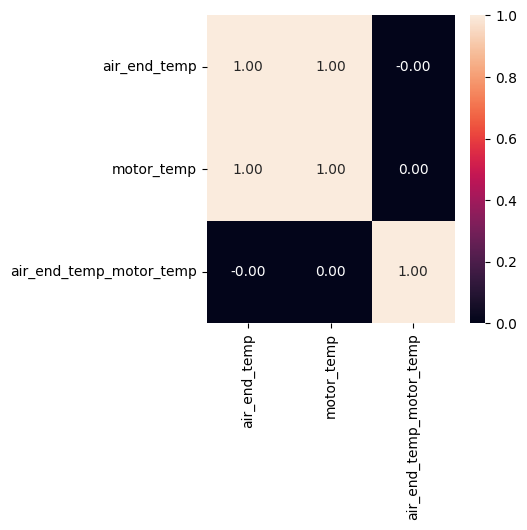

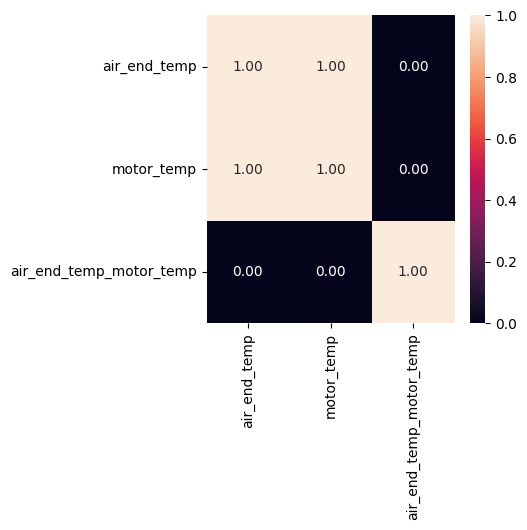

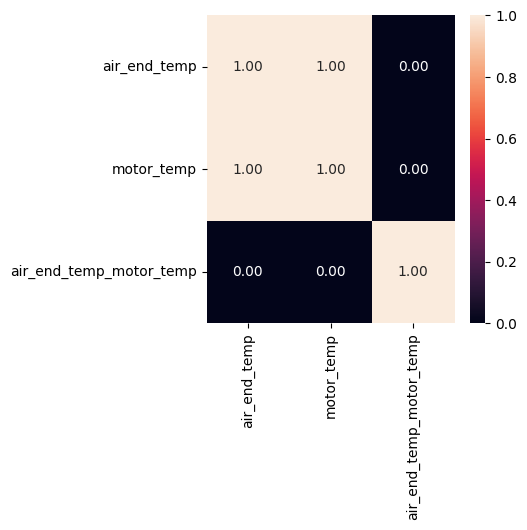

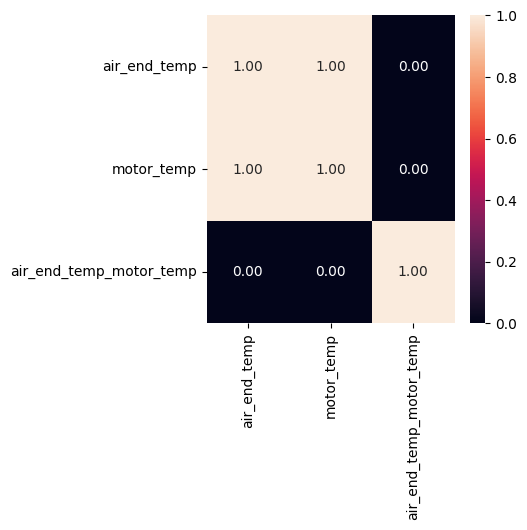

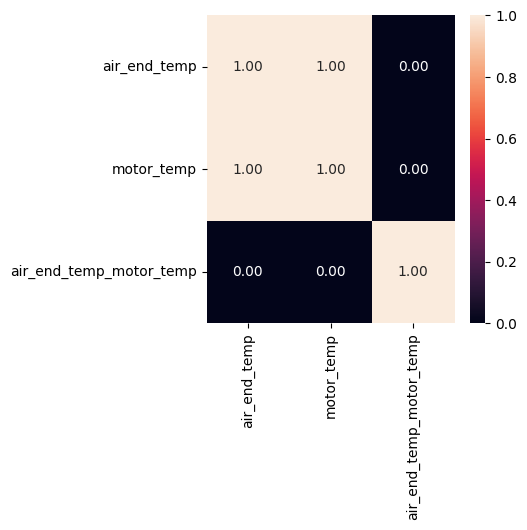

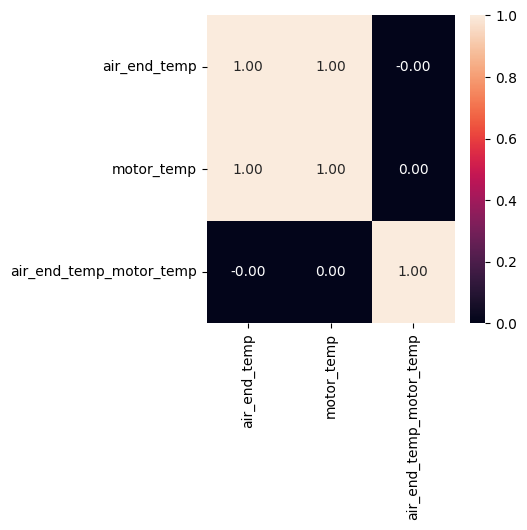

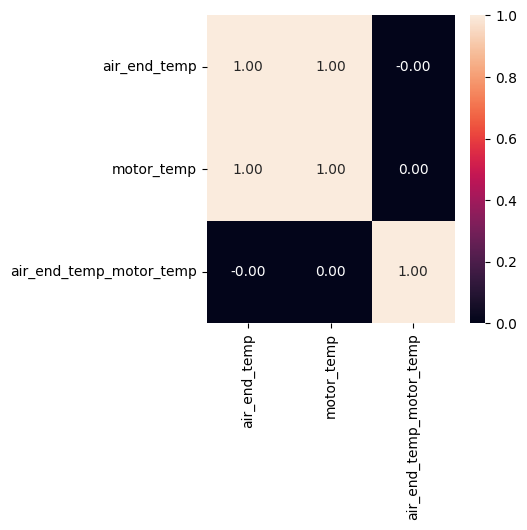

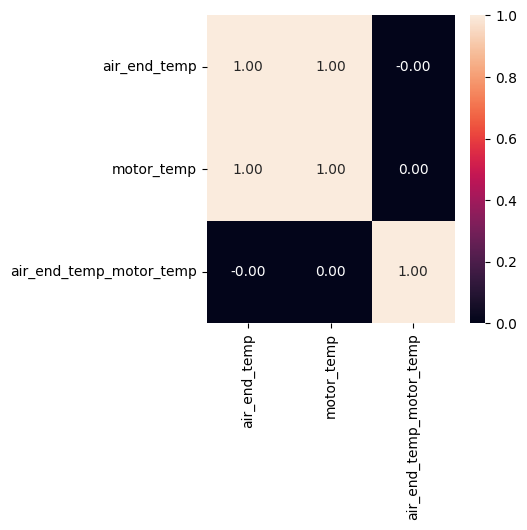

In [469]:
i_cols = [n for n in train_00.columns if n != 'type' and n != 'HP' and n != 'out_pressure']
print(i_cols)
plt.figure(figsize=(4,4))
sns.heatmap(train_00[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(train_01[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(train_02[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(train_03[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(train_04[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(train_05[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(train_06[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(train_07[i_cols].corr(), annot=True, fmt='.2f')
plt.show()

In [428]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [429]:
def isofr(train, test, new_type, only_abnormal=True, n_estimators=100, contamination=0.01):
    tmp = test.copy()
    # display(tmp)
    # IsolationForest 알고리즘을 사용하여 이상치 탐지
    model = IsolationForest(n_estimators=n_estimators, max_samples='auto', contamination=contamination, random_state=42, verbose=1, bootstrap=True)
    model.fit(train)

    # 예측하기
    pred = model.predict(test)
    # 고장 = 1, 정상 = 0 으로 바꾸기
    fix_pred = [0 if i==1 else 1 for i in pred]
    print('전체 데이터 수:', len(fix_pred))
    print('고장 데이터 수: ', fix_pred.count(1))
    print('고장 데이터 비율: ', round(fix_pred.count(1)/len(fix_pred),4))
    tmp['abnorm'] = fix_pred

    
    # 시각화
    # xmin,xmax = tmp[train.columns[1]].min()-1, tmp[train.columns[1]].max()+1
    if only_abnormal :
        sns.scatterplot(x=train.columns[2], y=train.columns[1], data=tmp.loc[tmp['abnorm']==1])
    else :
        # plt.figure(figsize=(12,12))
        # plt.subplot(331)
        sns.scatterplot(x=train.columns[2], y=train.columns[1], data=tmp, hue = 'abnorm')
        # plt.subplot(332)
        # sns.scatterplot(x='air_end_temp', y='air_end_temp_motor_temp', data=tmp, hue = 'abnorm')
        # plt.subplot(333)
        # sns.scatterplot(x='air_end_temp', y='motor_rpm_motor_temp', data=tmp, hue = 'abnorm')
        # plt.subplot(334)
        # sns.scatterplot(x='motor_rpm', y='air_end_temp_motor_rpm', data=tmp, hue = 'abnorm')
        # plt.subplot(335)
        # sns.scatterplot(x='motor_rpm', y='air_end_temp_motor_temp', data=tmp, hue = 'abnorm')
        # plt.subplot(336)
        # sns.scatterplot(x='motor_rpm', y='motor_rpm_motor_temp', data=tmp, hue = 'abnorm')
        # plt.subplot(337)
        # sns.scatterplot(x='motor_temp', y='air_end_temp_motor_rpm', data=tmp, hue = 'abnorm')
        # plt.subplot(338)
        # sns.scatterplot(x='motor_temp', y='air_end_temp_motor_temp', data=tmp, hue = 'abnorm')
        # plt.subplot(339)
        # sns.scatterplot(x='motor_temp', y='motor_rpm_motor_temp', data=tmp, hue = 'abnorm')
    plt.tight_layout()
    plt.title(f'Distribution of abnorm in f_x_train_0')
    # plt.xlim(xmin,xmax)
    # plt.ylim(tmp[train.columns[2]].min()-1,tmp[train.columns[2]].max()+1)
    # plt.ylim([-20, 20])
    # plt.hlines(xmin=xmin,xmax=xmax,y=0,color='red')
    # plt.hlines(xmin=xmin,xmax=xmax,y=df_linear.loc[new_type,'max'],color='green', linestyle='--')
    # plt.hlines(xmin=xmin,xmax=xmax,y=df_linear.loc[new_type,'min'],color='green', linestyle='--')
    plt.show();
    return fix_pred

In [430]:
# f_x_data_0 = train_00.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_data_1 = train_01.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_data_2 = train_02.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_data_3 = train_03.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_data_4 = train_04.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_data_5 = train_05.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_data_6 = train_06.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_data_7 = train_07.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)

# f_x_test_0 = test_00.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_test_1 = test_01.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_test_2 = test_02.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_test_3 = test_03.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_test_4 = test_04.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_test_5 = test_05.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_test_6 = test_06.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)
# f_x_test_7 = test_07.drop(['air_end_temp', 'out_pressure', 'motor_rpm', 'motor_temp', 'type', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'motor_rpm_motor_temp'], axis=1)

In [431]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# f_x_data_0 = pca.fit_transform(f_x_data_0)
# f_x_test_0 = pca.transform(f_x_test_0)

# f_x_data_0 = pd.DataFrame(f_x_data_0, columns=['x1', 'x2'])
# f_x_test_0 = pd.DataFrame(f_x_test_0, columns=['x1', 'x2'])

# f_x_data_0.columns, f_x_test_0.columns

In [470]:
train_00.columns

Index(['air_end_temp', 'motor_temp', 'air_end_temp_motor_temp'], dtype='object')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


전체 데이터 수: 1296
고장 데이터 수:  232
고장 데이터 비율:  0.179


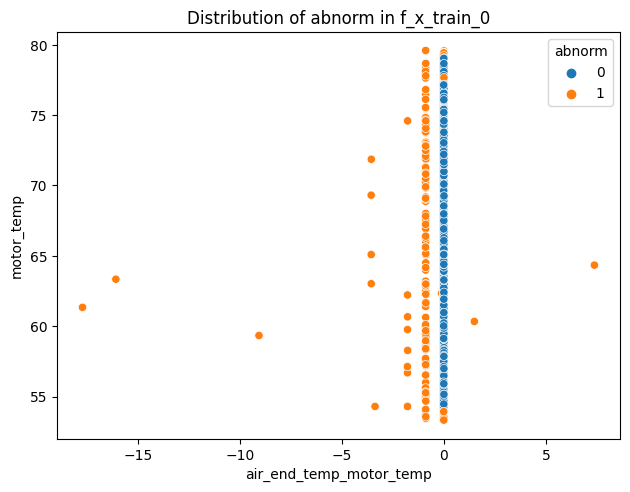

In [490]:
to_ts_pred_0 = isofr(train_00, test_00, 0, False, 500, 0.084)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


전체 데이터 수: 1107
고장 데이터 수:  0
고장 데이터 비율:  0.0


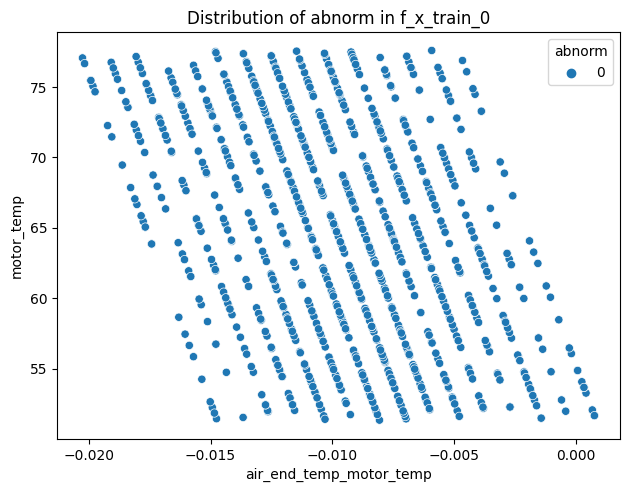

In [472]:
to_ts_pred_1 = isofr(train_01, test_01, 1 , False, 500, 0.05)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


전체 데이터 수: 1098
고장 데이터 수:  76
고장 데이터 비율:  0.0692


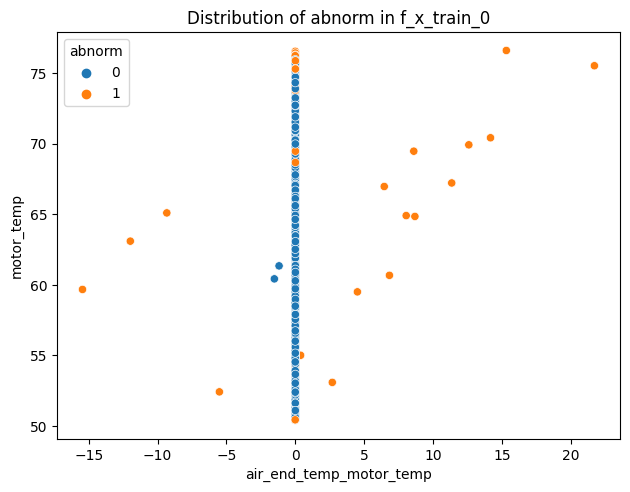

In [502]:
to_ts_pred_2 = isofr(train_02, test_02, 2, False, 500, 0.043)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


전체 데이터 수: 918
고장 데이터 수:  86
고장 데이터 비율:  0.0937


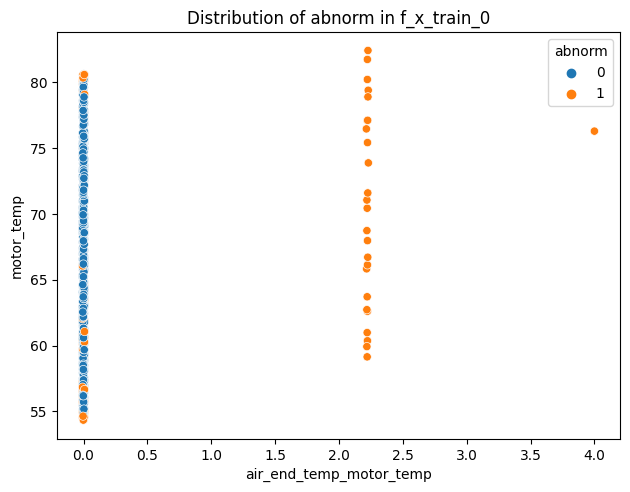

In [518]:
to_ts_pred_3 = isofr(train_03, test_03, 3, False, 500, 0.0425)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


전체 데이터 수: 918
고장 데이터 수:  9
고장 데이터 비율:  0.0098


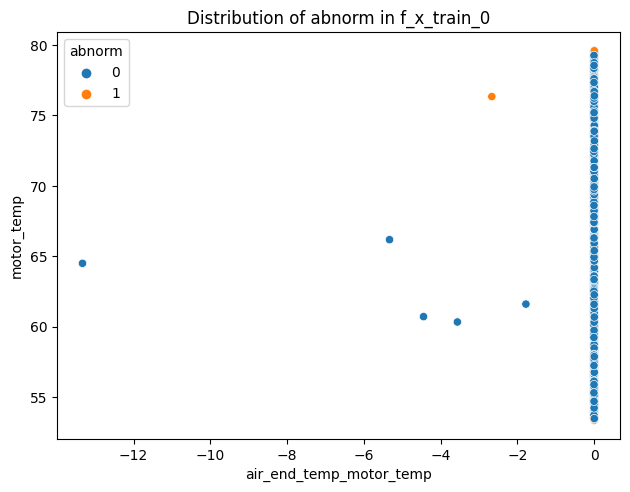

In [524]:
to_ts_pred_4 = isofr(train_04, test_04, 4, False, 500, 0.001)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


전체 데이터 수: 747
고장 데이터 수:  87
고장 데이터 비율:  0.1165


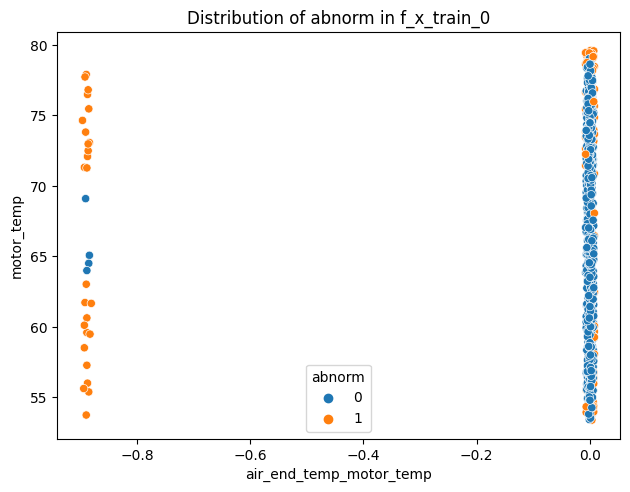

In [527]:
to_ts_pred_5 = isofr(train_05, test_05, 5, False, 500, 0.1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


전체 데이터 수: 747
고장 데이터 수:  135
고장 데이터 비율:  0.1807


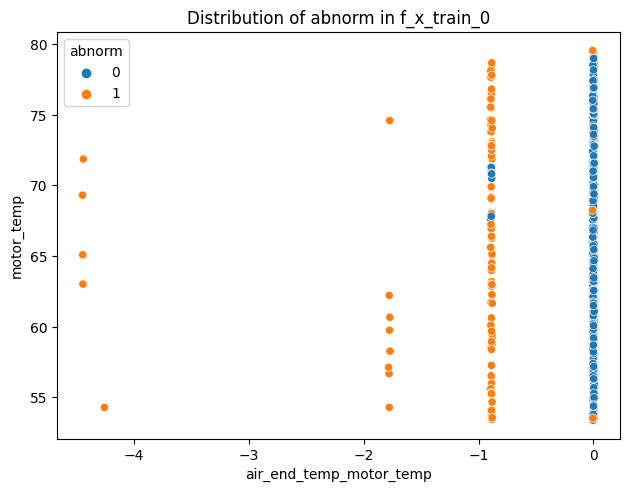

In [478]:
to_ts_pred_6 = isofr(train_06, test_06, 6, False, 500, 0.038)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


전체 데이터 수: 558
고장 데이터 수:  19
고장 데이터 비율:  0.0341


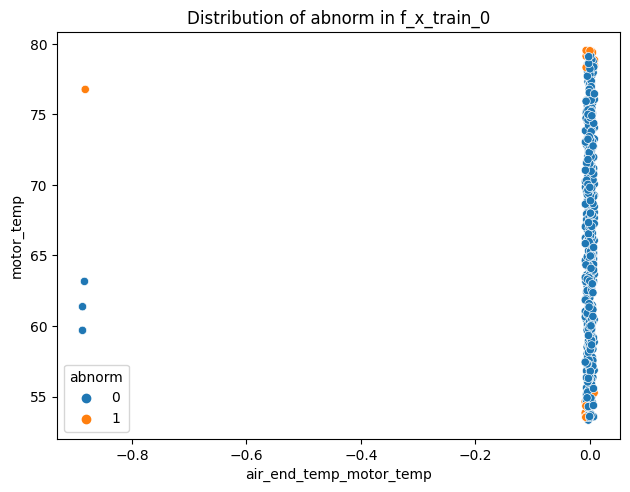

In [479]:
to_ts_pred_7 = isofr(train_07, test_07, 7, False, 500, 0.024)

In [ ]:
print(sum(to_ts_pred_0) + sum(to_ts_pred_1) + sum(to_ts_pred_2) + sum(to_ts_pred_3) + sum(to_ts_pred_4) + sum(to_ts_pred_5) + sum(to_ts_pred_6) + sum(to_ts_pred_7))
print(sum(to_ts_pred_0), sum(to_ts_pred_1), sum(to_ts_pred_2), sum(to_ts_pred_3), sum(to_ts_pred_4), sum(to_ts_pred_5), sum(to_ts_pred_6), sum(to_ts_pred_7))

466
156 0 68 56 8 44 117 17


In [ ]:
test_00['pred'] = to_ts_pred_0
test_01['pred'] = to_ts_pred_1
test_02['pred'] = to_ts_pred_2
test_03['pred'] = to_ts_pred_3
test_04['pred'] = to_ts_pred_4
test_05['pred'] = to_ts_pred_5
test_06['pred'] = to_ts_pred_6
test_07['pred'] = to_ts_pred_7

In [ ]:
df_pred = pd.concat([test_00, test_01, test_02, test_03, test_04, test_05, test_06, test_07],axis=0).sort_index()
df_pred

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe,pred
0,2.51,53.28,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,26.67,2182.0,64.24,3.21,0
...,...,...,...,...,...,...,...
7384,2.12,48.08,27.45,2246.0,64.96,3.25,0
7385,1.48,39.63,19.19,1570.0,57.44,2.87,0
7386,1.56,40.61,20.15,1649.0,58.32,2.92,1
7387,1.59,40.99,20.52,1679.0,58.66,2.93,0


In [ ]:
train.shape, test.shape

((2447, 8), (7389, 8))

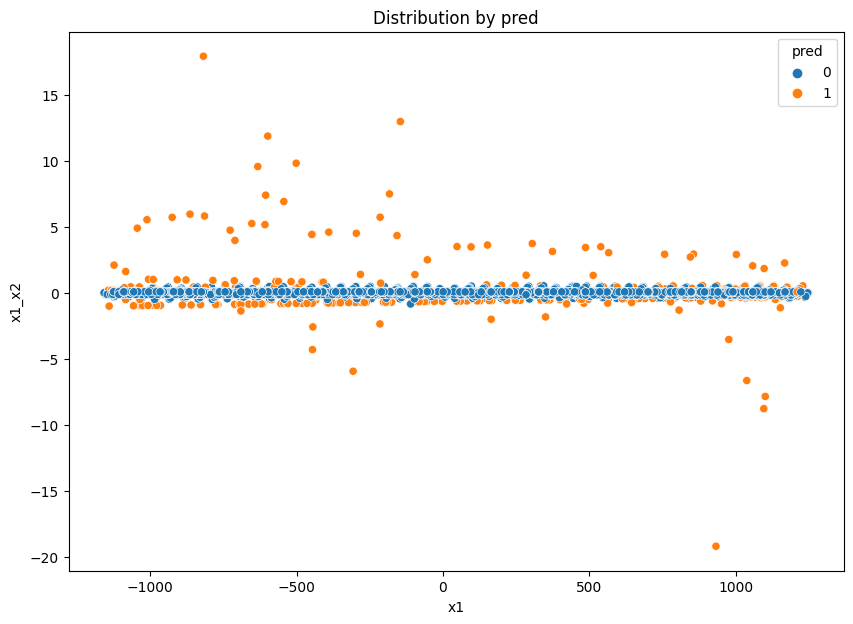

In [ ]:
plt.figure(figsize=(10,7))

test_000['pred'] = to_ts_pred_0
test_001['pred'] = to_ts_pred_1
test_002['pred'] = to_ts_pred_2
test_003['pred'] = to_ts_pred_3
test_004['pred'] = to_ts_pred_4
test_005['pred'] = to_ts_pred_5
test_006['pred'] = to_ts_pred_6
test_007['pred'] = to_ts_pred_7
df_pred_t = pd.concat([test_000, test_001, test_002, test_003, test_004, test_005, test_006, test_007],axis=0).sort_index()
sns.scatterplot(x='x1', y='x1_x2', data=df_pred_t, hue='pred')
plt.title('Distribution by pred')
plt.show()

In [ ]:
def make_sub(filename, pred) :
    df_sub = pd.read_csv('/content/drive/MyDrive/KT_Aivle_School/Data/Contest/AISPARK_4th/answer_sample.csv')
    df_sub['label'] = pred
    df_sub.to_csv('/content/drive/MyDrive/KT_Aivle_School/Data/Contest/AISPARK_4th/submit06.csv', index=False)
    print('제출 파일 작성 완료!')

In [ ]:
make_sub('submit5',df_pred['pred'])

제출 파일 작성 완료!
